# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

Using the provided data set on car prices we will attempt to gain a greater understanding of the underlying mechanisms through which price is determined. We will be doing this through a model-based framework, relying on the features in the aforementioned data set to provide deeper insight by carefully examining the data itself and by analyzing every step in the model creation and deployment process. 
It is worth noting that we are less concerned with the creation of an optimal model to predict the price of a car better than all other models. Rather, we are focused on the mechanisms that such a model would have to rely on. We will develop a variety of models and analyze the better-performing models to figure out what they rely on. 

An ideal outcome of this project would be to identify a few key drivers of price that would be broadly useable in an economic context. 


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv('data/vehicles.csv')

In [196]:
pd.set_option('display.max_columns', None)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

The numerical columns are: price, year, cylinders, and odometer.

The unimportant columns are: id and VIN.

The categorical columns are : region, manufacturer, model, condition, title_status, transmission, drive,
size, type, paint_color, and state.

In [7]:
df.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [30]:
df_clean=df.copy()

In [31]:
df_clean=df_clean.drop(columns=['id','VIN'])
print(df_clean.columns)

Index(['region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')


#### numerical feature cleaning:

In [32]:
def get_cylinder_count(x):
    if pd.isnull(x):
        return(x)
    if x == 'other':
        return(None)
    else:
        out_num = x.split(' ')[0]
        return(int(out_num))

In [35]:
df_clean.cylinders=df_clean.cylinders.apply(get_cylinder_count)

In [43]:
df_clean.cylinders = df_clean.cylinders.fillna(df_clean.cylinders.mean())

In [44]:
df_clean.cylinders.isnull().sum()

0

In [50]:
df_clean.year=df_clean.year.fillna(df_clean.year.mean())

In [55]:
odometer_mean=df_clean.odometer.mean()
df_clean.odometer=df_clean.odometer.fillna(odometer_mean)

### Categorical cleaning:

region, manufacturer, model, condition, title_status, transmission, drive,
size, type, paint_color, and state.

In [57]:
df_clean.isnull().sum()

region               0
price                0
year                 0
manufacturer     17646
model             5277
condition       174104
cylinders            0
fuel              3013
odometer             0
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [69]:
len(df_clean.manufacturer.value_counts()) #OHE for all values.

42

In [73]:
df_clean.manufacturer=df_clean.manufacturer.fillna('unknown')
df_clean.manufacturer.isnull().sum()

0

In [243]:
models_tokeep=df_clean.model.value_counts()[:10].index.tolist() # top 100 most common car models

In [244]:
def model_cleaner(x):
    if pd.isnull(x) or x in models_tokeep:
        return(x)
    else:
        return('less_freq_model')

In [245]:
df_clean.model=df_clean.model.apply(model_cleaner)

In [246]:
df_clean.model=df_clean.model.fillna('unknown')

In [94]:
df_clean.isnull().sum()

region               0
price                0
year                 0
manufacturer         0
model                0
condition       174104
cylinders            0
fuel              3013
odometer             0
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [97]:
df_clean.condition=df_clean.condition.fillna('unknown')
df_clean.condition.isnull().sum()

0

In [107]:
# features with a relatively small number of missing values are cleaned
#by simply dropping rows that contain said missing values.

df_clean=df_clean.dropna(axis=0,subset=['fuel','title_status','transmission'])




In [ ]:
'''
drive           
size            
type           
paint_color
'''

In [110]:
df_clean.drive.value_counts()

4wd    128032
fwd    103722
rwd     58171
Name: drive, dtype: int64

In [117]:
df_clean.drive=df_clean.drive.fillna('unknown')
df_clean.drive.isnull().sum()

0

In [127]:
df_clean['size']=df_clean['size'].fillna('unknown')
df_clean['size'].value_counts(dropna=False)


unknown        294932
full-size       63208
mid-size        34471
compact         19260
sub-compact      3129
Name: size, dtype: int64

In [131]:
df_clean['type']=df_clean['type'].fillna('unknown')
df_clean['type'].value_counts(dropna=False)

unknown        91386
sedan          84598
SUV            74181
pickup         42634
truck          34190
other          21099
coupe          18860
hatchback      16282
wagon          10410
van             7872
convertible     7598
mini-van        4764
offroad          609
bus              517
Name: type, dtype: int64

In [135]:
df_clean.paint_color=df_clean.paint_color.fillna('unknown')
df_clean.paint_color.value_counts(dropna=False)

unknown    122452
white       78126
black       61976
silver      42400
blue        30837
red         30109
grey        24037
green        7298
brown        6538
custom       6507
yellow       2086
orange       1948
purple        686
Name: paint_color, dtype: int64

In [254]:
top10regions=df_clean.region.value_counts()[:10].index.tolist()
region_clean=lambda x: x if x in top10regions else 'less_freq_region'
df_clean.region=df_clean.region.apply(region_clean)

In [281]:
Range=df_clean.price

In [274]:

num_cols=['year','cylinders','odometer']
cat_cols=['region','manufacturer','model','condition','fuel',
 'title_status','transmission','drive','size','type','paint_color','state']

In [275]:
X_num=df_clean[num_cols]
X_cat=df_clean[cat_cols]

In [276]:
X_num=(X_num-X_num.mean())/X_num.std() #standard normal scaling applied to the numerical features.

In [277]:
{y:len(X_cat[y].value_counts()) for y in X_cat.columns}# categorical features value counts

{'region': 10,
 'manufacturer': 43,
 'model': 10,
 'condition': 7,
 'fuel': 5,
 'title_status': 6,
 'transmission': 3,
 'drive': 4,
 'size': 5,
 'type': 14,
 'paint_color': 13,
 'state': 51}

In [278]:
X_cat_ohe=pd.get_dummies(X_cat)

In [280]:
Domain=pd.concat([X_num,X_cat_ohe],axis=1)

In [283]:
prepared_df = pd.concat([Range,Domain], axis = 1)

In [284]:
prepared_df=prepared_df.reset_index(drop=True)

In [285]:
prepared_df.to_parquet('data/Car_price_cleaned_scaled.parquet') # this is the final dataset ready for use in predictive models.


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [ ]:
'''
· Use of multiple regression models
· Cross-validation of models
· Grid search hyperparameters
· Appropriate interpretation of coefficients in models
· Appropriate interpretation of evaluation metric
· Clear identification of evaluation metric
· Clear rationale for use of given evaluation metric'''

In [14]:
from sklearn.linear_model import LinearRegression, HuberRegressor, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from xgboost import XGBRegressor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_rows', 175)
def feat_importance_frame(feature_names,feature_importances):
    out=pd.DataFrame({'feature_name':feature_names,
                      'feature_importance':feature_importances})
    out['abs_importance']=out.feature_importance.apply(np.abs)
    out=out.sort_values(by='abs_importance',ascending=False)
    out=out.reset_index(drop = True)
    return(out)

In [4]:
df_mod=pd.read_parquet('data/Car_price_cleaned_scaled.parquet')

In [5]:
Y=df_mod.price
X=df_mod.drop(columns=['price'])

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)





regression_basic=LinearRegression()
regression_basic.fit(x_train,y_train)



preds=regression_basic.predict(x_test)

LinearRegression()

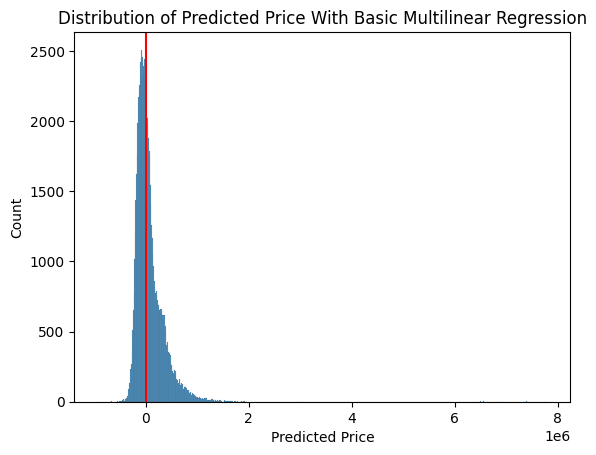

In [61]:
sns.histplot(preds)
plt.title('Distribution of Predicted Price With Basic Multilinear Regression')
plt.xlabel("Predicted Price")
plt.axvline(0,color = 'r')
plt.show()

In [10]:
mean_squared_error(y_test,regression_basic.predict(x_test))

219379744070090.2

In [11]:
reg_numerical=LinearRegression().fit(x_train.iloc[:,:3],y_train)

In [12]:
mean_squared_error(y_test,reg_numerical.predict(x_test.iloc[:,:3]))



219397587459349.53

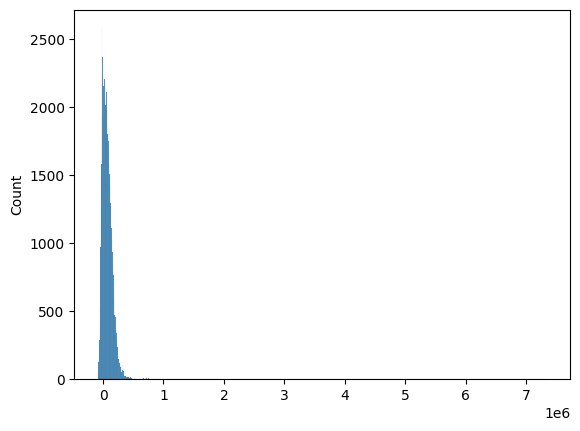

In [13]:
reg_numerical_predictions=reg_numerical.predict(x_test.iloc[:,:3])
sns.histplot(reg_numerical_predictions)
plt.show()

In [15]:
lasso_reg = Lasso(alpha=1200, max_iter = 1000, selection='random',tol = 0.001).fit(x_train,y_train)

y_preds_lasso=lasso_reg.predict(x_test)
print(mean_squared_error(y_preds_lasso,y_test))

219372112985494.5


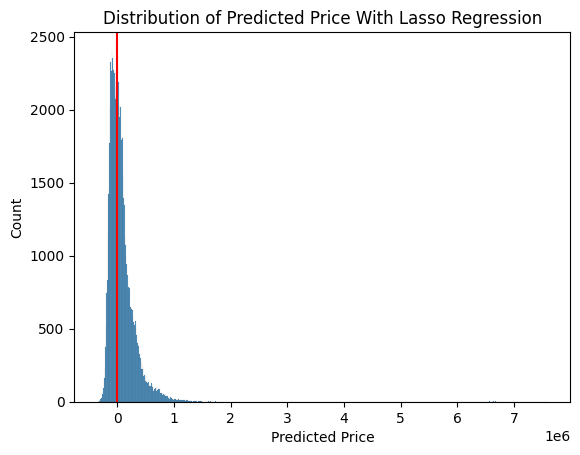

In [62]:
sns.histplot(y_preds_lasso)
plt.title('Distribution of Predicted Price With Lasso Regression')
plt.xlabel("Predicted Price")
plt.axvline(0,color = 'r')
plt.show()

In [65]:
#Lasso regression with the above parameters makes all but 54 coeficcients zero 
lasso_importances=feat_importance_frame(lasso_reg.feature_names_in_,lasso_reg.coef_)
lasso_importances[lasso_importances.feature_importance!=0].shape

(54, 3)

In [66]:
ridge_reg=Ridge(alpha=1100).fit(x_train,y_train)
pred_ridge=ridge_reg.predict(x_test)
print(mean_squared_error(y_test,pred_ridge))

feat_importance_frame(ridge_reg.feature_names_in_,ridge_reg.coef_).head()

,feature_name,feature_importance,abs_importance
0,condition_fair,544227.188923,544227.188923
1,model_unknown,444656.201293,444656.201293
2,paint_color_green,422428.578661,422428.578661
3,state_tn,356978.930065,356978.930065
4,state_nj,298115.916256,298115.916256


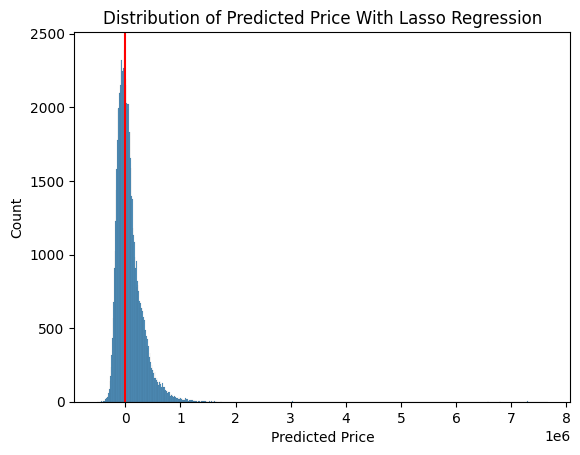

In [67]:
sns.histplot(pred_ridge)
plt.title('Distribution of Predicted Price With Ridge Regression')
plt.xlabel("Predicted Price")
plt.axvline(0,color = 'r')
plt.show()

In [68]:
elastic_reg=ElasticNet(alpha=25,tol=0.0001, l1_ratio=0.5).fit(x_train,y_train)
elastic_preds=elastic_reg.predict(x_test)
mean_squared_error(elastic_preds,y_test)

feat_importance_frame(elastic_reg.feature_names_in_,elastic_reg.coef_).head()



,feature_name,feature_importance,abs_importance
0,odometer,11757.040367,11757.040367
1,year,-5437.481594,5437.481594
2,cylinders,2183.448645,2183.448645
3,type_unknown,1668.303507,1668.303507
4,manufacturer_toyota,1424.037753,1424.037753


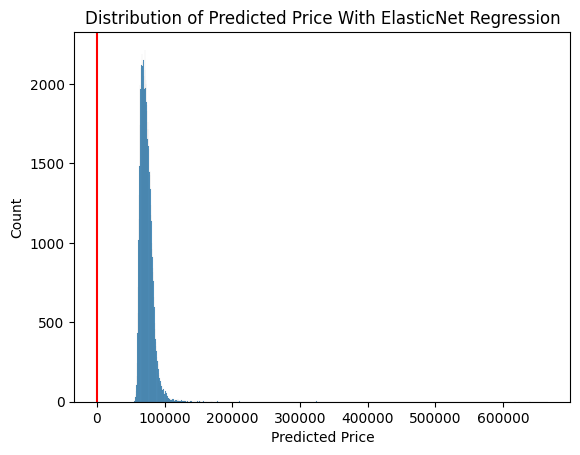

In [70]:
sns.histplot(elastic_preds)
plt.title('Distribution of Predicted Price With ElasticNet Regression')
plt.xlabel("Predicted Price")
plt.axvline(0,color = 'r')
plt.show()
#idk why it did this.

In [30]:
ridge_params={'alpha':[100,1000,5000,10000,25000,100000,250000]}
ridge_gridsearch = GridSearchCV(Ridge(),
                                ridge_params,
                                cv=KFold(n_splits=3).split(X),
                                scoring='neg_mean_squared_error',
                               verbose=2).fit(X,Y)

ridge_gridsearch.best_estimator_




Fitting 3 folds for each of 7 candidates, totalling 21 fits
[CV] END ..........................................alpha=100; total time=   1.4s
[CV] END ..........................................alpha=100; total time=   0.9s
[CV] END ..........................................alpha=100; total time=   1.0s
[CV] END .........................................alpha=1000; total time=   0.9s
[CV] END .........................................alpha=1000; total time=   1.0s
[CV] END .........................................alpha=1000; total time=   0.9s
[CV] END .........................................alpha=5000; total time=   1.1s
[CV] END .........................................alpha=5000; total time=   1.1s
[CV] END .........................................alpha=5000; total time=   1.2s
[CV] END ........................................alpha=10000; total time=   0.9s
[CV] END ........................................alpha=10000; total time=   1.0s
[CV] END ........................................

Ridge(alpha=250000)

In [35]:
best_ridge=Ridge(**ridge_gridsearch.best_params_).fit(x_train,y_train)


mean_squared_error(best_ridge.predict(x_test),y_test)


ridge_feat_importances=feat_importance_frame(best_ridge.feature_names_in_,best_ridge.coef_)
ridge_feat_importances

,feature_name,feature_importance,abs_importance
0,odometer,86497.299813,86497.299813
1,year,-33131.598025,33131.598025
2,manufacturer_toyota,21515.487372,21515.487372
3,type_unknown,17980.914478,17980.914478
4,condition_fair,16365.335787,16365.335787
5,state_tn,13260.405023,13260.405023
6,cylinders,13188.605182,13188.605182
7,paint_color_green,12353.660521,12353.660521
8,type_pickup,12296.240286,12296.240286
9,state_or,11066.900859,11066.900859


In [36]:
elastic_params={'alpha':[1,2.5,5,7.5,10],'l1_ratio':[0.25,0.5,0.625,0.75,],'tol':[0.00001]}
elastic_gridsearch=GridSearchCV(ElasticNet(),
                                elastic_params,
                                cv=KFold(n_splits=5).split(X),
                                scoring='neg_mean_squared_error',
                               verbose=2).fit(X,Y)
elastic_gridsearch.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ..................alpha=1, l1_ratio=0.25, tol=1e-05; total time=   1.5s
[CV] END ..................alpha=1, l1_ratio=0.25, tol=1e-05; total time=   1.2s
[CV] END ..................alpha=1, l1_ratio=0.25, tol=1e-05; total time=   1.1s
[CV] END ..................alpha=1, l1_ratio=0.25, tol=1e-05; total time=   1.1s
[CV] END ..................alpha=1, l1_ratio=0.25, tol=1e-05; total time=   1.4s
[CV] END ...................alpha=1, l1_ratio=0.5, tol=1e-05; total time=   1.3s
[CV] END ...................alpha=1, l1_ratio=0.5, tol=1e-05; total time=   1.1s
[CV] END ...................alpha=1, l1_ratio=0.5, tol=1e-05; total time=   1.1s
[CV] END ...................alpha=1, l1_ratio=0.5, tol=1e-05; total time=   1.1s
[CV] END ...................alpha=1, l1_ratio=0.5, tol=1e-05; total time=   1.1s
[CV] END .................alpha=1, l1_ratio=0.625, tol=1e-05; total time=   1.1s
[CV] END .................alpha=1, l1_ratio=0.6

ElasticNet(alpha=2.5, l1_ratio=0.25, tol=1e-05)

In [37]:
elastic_feat_importances=feat_importance_frame(elastic_gridsearch.best_estimator_.feature_names_in_,elastic_gridsearch.best_estimator_.coef_)

In [71]:
elastic_feat_importances.head(20) #these are the most reasonable results 


,feature_name,feature_importance,abs_importance
0,odometer,41934.937309,41934.937309
1,year,-17903.970275,17903.970275
2,type_unknown,12138.764028,12138.764028
3,cylinders,11568.531921,11568.531921
4,model_unknown,7322.984640,7322.984640
5,manufacturer_mercedes-benz,6884.458518,6884.458518
6,manufacturer_toyota,6806.561486,6806.561486
7,paint_color_unknown,6286.975070,6286.975070
8,model_less_freq_model,-6143.534616,6143.534616
9,condition_fair,5444.759267,5444.759267


In [39]:
lasso_params={'alpha':[500,1000,1500,5000,10**4],
              'tol':[0.00001],'selection' : ['random'],'max_iter':[5000]}
lasso_gridsearch=GridSearchCV(Lasso(),
                            lasso_params,
                            cv=KFold(n_splits=7).split(X),
                            verbose=1,
                            scoring='neg_mean_squared_error')
lasso_gridsearch.fit(X,Y)

lasso_gridsearch.best_estimator_


Fitting 7 folds for each of 5 candidates, totalling 35 fits


Lasso(alpha=10000, max_iter=5000, selection='random', tol=1e-05)

In [40]:
lasso_best=Lasso(**lasso_gridsearch.best_params_).fit(x_train,y_train)

print(mean_squared_error(y_test,lasso_best.predict(x_test)))

best_lasso_features=feat_importance_frame(lasso_best.feature_names_in_,lasso_best.coef_)

best_lasso_features # these are fairly reasonable as well

219393236283149.44


,feature_name,feature_importance,abs_importance
0,odometer,138484.643342,138484.643342
1,condition_fair,132389.187545,132389.187545
2,manufacturer_toyota,106682.457193,106682.457193
3,type_unknown,37965.244699,37965.244699
4,year,-37250.519649,37250.519649
5,cylinders,14704.661164,14704.661164
6,state_tn,14248.725841,14248.725841
7,type_pickup,12707.389542,12707.389542
8,drive_4wd,3823.615405,3823.615405
9,region_new hampshire,-0.000000,0.000000


With the majority of modeling done, we may now take a step back and examine a few of the results of the above models. Most notably we may observe that Lasso, ElasticNet, and Ridge regression, to a lesser extent, all provided a degree of feature selection. With this observation we can proceed to train models using only the important features. This allows us to use more sophisticated models and for us to do a better job of hyper-parameter tuning. 

In [41]:
ft_selected_lasso=best_lasso_features[best_lasso_features.abs_importance>0].feature_name.tolist()
ft_selected_elastic = elastic_feat_importances.head(15).feature_name.tolist()
ft_selected_ridge = ridge_feat_importances.head(40).feature_name.tolist()

In [42]:
xgbreg_las=XGBRegressor(eval_metric=mean_squared_error)
xgbreg_ela=XGBRegressor(eval_metric=mean_squared_error)
xgbreg_rid=XGBRegressor(eval_metric=mean_squared_error)

In [43]:
print(mean_squared_error(xgbreg_las.fit(x_train[ft_selected_lasso],y_train).predict(x_test[ft_selected_lasso]),y_test))
print(mean_squared_error(xgbreg_ela.fit(x_train[ft_selected_elastic],y_train).predict(x_test[ft_selected_elastic]),y_test))
print(mean_squared_error(xgbreg_rid.fit(x_train[ft_selected_ridge],y_train).predict(x_test[ft_selected_ridge]),y_test))


202466415371195.66
114604247556112.23
278801614146991.72


In [52]:
xgb_params={'eval_metric':[mean_squared_error],
              'learning_rate':[0.3,0.1,0.01],'max_depth' : [3,7,15],'n_estimators':[50,100,200]}
xgb_gridsearch=GridSearchCV(XGBRegressor(),
                            xgb_params,
                            cv=KFold(n_splits=5).split(X[ft_selected_elastic]),
                            verbose=2,
                            scoring='neg_mean_squared_error')
xgb_gridsearch.fit(X[ft_selected_elastic],Y)

xgb_gridsearch.best_estimator_

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.3, max_depth=3, n_estimators=50; total time=   2.5s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.3, max_depth=3, n_estimators=50; total time=   2.4s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.3, max_depth=3, n_estimators=50; total time=   2.3s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.3, max_depth=3, n_estimators=50; total time=   2.4s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.3, max_depth=3, n_estimators=50; total time=   2.3s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.3, max_depth=3, n_estimators=100; total time=   4.4s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.3, max_depth=3, n_estim

[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.1, max_depth=3, n_estimators=200; total time=  14.2s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.1, max_depth=7, n_estimators=50; total time=   8.6s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.1, max_depth=7, n_estimators=50; total time=   8.8s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.1, max_depth=7, n_estimators=50; total time=   9.3s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.1, max_depth=7, n_estimators=50; total time=   8.8s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.1, max_depth=7, n_estimators=50; total time=   9.4s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.1, max_depth=7, n_estimators=100; total time=  17.3s
[CV] END eval_metric=<function m

[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.01, max_depth=7, n_estimators=200; total time=  31.6s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.01, max_depth=7, n_estimators=200; total time=  32.5s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.01, max_depth=15, n_estimators=50; total time=  20.2s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.01, max_depth=15, n_estimators=50; total time=  20.2s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.01, max_depth=15, n_estimators=50; total time=  20.4s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.01, max_depth=15, n_estimators=50; total time=  20.9s
[CV] END eval_metric=<function mean_squared_error at 0x7fa938800d30>, learning_rate=0.01, max_depth=15, n_estimators=50; total time=  20.3s
[CV] END eval_metric

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False,
             eval_metric=<function mean_squared_error at 0x7fa938800d30>,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.01, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=15,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=50, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None, ...)

In [60]:
xgbr_best=XGBRegressor(**xgb_gridsearch.best_params_).fit(x_train[ft_selected_elastic],y_train)

xgbr_best_preds=xgbr_best.predict(x_test[ft_selected_elastic])
mean_squared_error(xgbr_best_preds,y_test)

xgbres=xgbr_best.feature_names_in_,xgbr_best.feature_importances_
xgb_feat_importances=feat_importance_frame(*xgbres)

In [72]:
xgb_feat_importances # this is a suprising result

,feature_name,feature_importance,abs_importance
0,manufacturer_toyota,0.473333,0.473333
1,drive_4wd,0.282689,0.282689
2,type_unknown,0.054164,0.054164
3,state_tn,0.049358,0.049358
4,paint_color_unknown,0.039416,0.039416
5,year,0.034037,0.034037
6,odometer,0.032019,0.032019
7,model_unknown,0.012482,0.012482
8,condition_fair,0.009467,0.009467
9,cylinders,0.009410,0.009410


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

Up until this point, we have expended quite a bit of effort to bring forth a variety of regression models from the most basic forms of multilinear regression to the more esoteric XGBoostRegressor which relies heavily on random forests. Each type of regression illuminated slightly different aspects of the more general problem. While the most basic form of regression did little to help our understanding, it did demonstrate that we would have tread carefully given the cardinality of the features. 
	To combat the dataset’s cardinality we looked to regression models that would allow for varying degrees of regularization and or feature selection. These models were the Ridge, ElasticNet, and Lasso Regressions which once trained and with hyper-parameters tuned provided the opportunity to examine feature importances. With Lasso the feature importances provide feature selection, keeping only the most important of columns. With Ridge and ElasticNet the feature importances offer a general consensus as to what the most important columns of the data set are. Using all this information we are able to feed only the dozen or so most important features to the XGBoostReggressor which allows a more thorough hyper-parameter tuning process. Finally, we once again examine the feature importances of all our better-performing models and arrive at a rough consensus for the most influential drivers of car price. 


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.